In [340]:
!gdown --id 107hBeH9NMJbxz5EuwGHC44I2NoqoZpjt
!gdown --id 1Oy8PJr3T70gEaUkDstC3lOSh6BW7rAcR

Downloading...
From: https://drive.google.com/uc?id=107hBeH9NMJbxz5EuwGHC44I2NoqoZpjt
To: /content/film-profile.png
100% 163k/163k [00:00<00:00, 1.89MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Oy8PJr3T70gEaUkDstC3lOSh6BW7rAcR
To: /content/profile_film.jpg
100% 45.0k/45.0k [00:00<00:00, 1.81MB/s]


In [341]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [342]:
image = cv2.imread("film-profile.png")

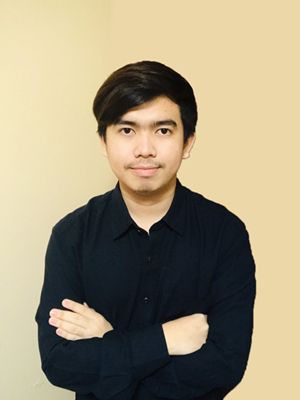

In [343]:
cv2_imshow(image )

## 1.Program that can insert your name and id

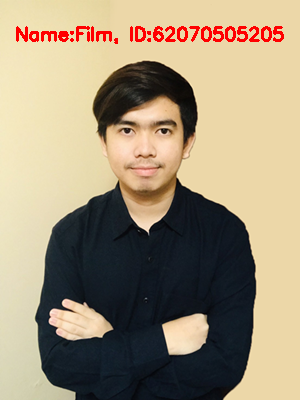

In [344]:
image = cv2.imread("film-profile.png")
cv2.putText(image,"Name:Film, ID:62070505205 ",(15,40),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),2)
cv2_imshow(image )

## 2.Program of super resolution

### Nearest Neighbor Interpolation

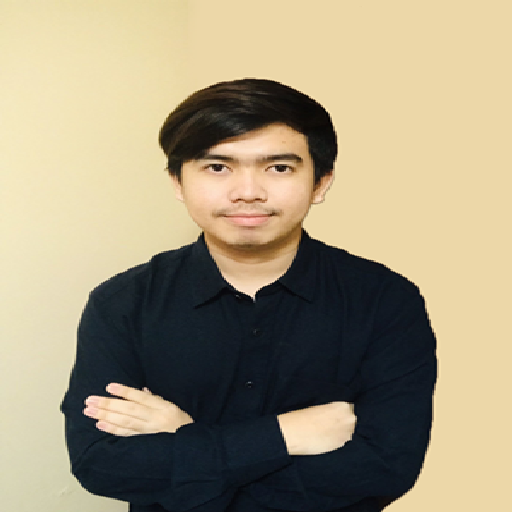

In [345]:
img = cv2.imread("film-profile.png")
nearest_img = cv2.resize(img, (512, 512), 10, 10, interpolation = cv2.INTER_NEAREST)
cv2_imshow(nearest_img)

### Bilinear Interpolation

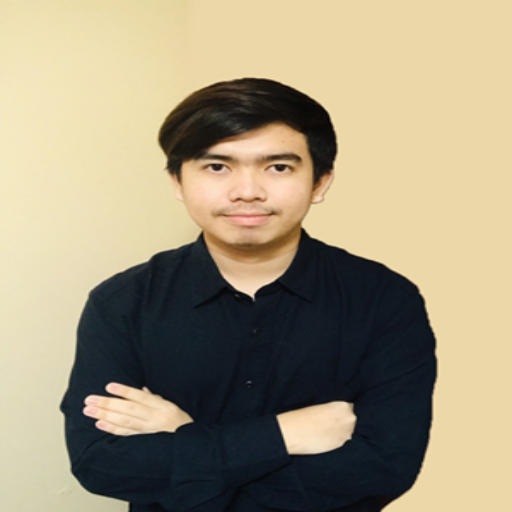

In [346]:
img = cv2.imread("film-profile.png")
linear_img = cv2.resize(img, (512, 512), 10, 10, interpolation = cv2.INTER_LINEAR)
cv2_imshow(linear_img)

### Bicubic Interpolation

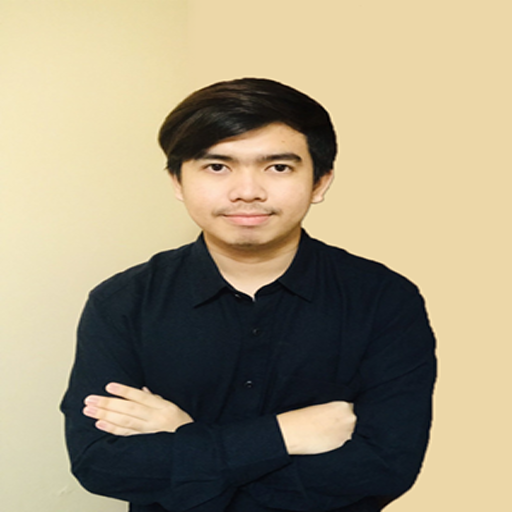

In [347]:
img = cv2.imread("film-profile.png")
cubi_img = cv2.resize(img, (512, 512), 10, 10, interpolation = cv2.INTER_CUBIC)
cv2_imshow(cubi_img)

ทำการ resize เพื่อที่จะแสดงให้เห็นถึงความแตกต่างของภาพมากขึ้น

Original Dimensions :  (724, 697, 3)
Resized Dimensions :  (36, 34, 3)


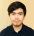

In [348]:
img = cv2.imread("/content/profile_film.jpg", cv2.IMREAD_UNCHANGED)
print('Original Dimensions : ',img.shape)
 
scale_percent = 5 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resize_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resize_img.shape)
cv2_imshow(resize_img)
# cv2.imwrite('Resized.jpg',resized)

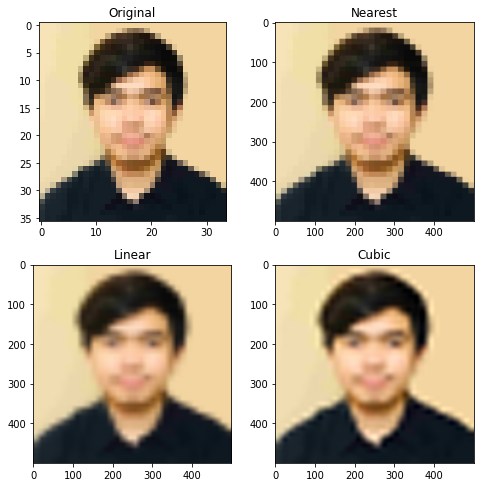

In [349]:
flag = [None,cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_CUBIC]
interp = ['Original','Nearest','Linear','Cubic']
plt.figure(figsize=[7,10])
for i in range(4):
    plt.subplot(321+i,title=interp[i])
    if(flag[i]!=None):
        plt.imshow(cv2.resize(resize_img[:,:,::-1],(500,500),interpolation=flag[i]))
    else:
        plt.imshow(resize_img[:,:,::-1])
plt.tight_layout()
plt.show()

หากใช้ Nearest Neighbor พบว่าภาพจะแตก แต่ถ้าใช้ Bilinear หรือ Bicubic ภาพจะดูสมูทกว่า ขอบภาพจะดูเนียนกว่า Nearest Neighbor

## 3.Program of gray level resolution

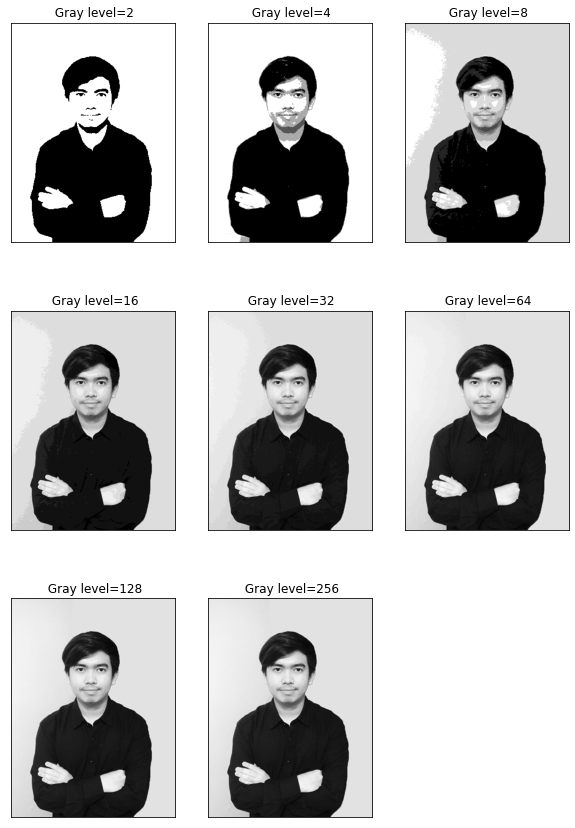

In [356]:
image = cv2.imread("film-profile.png",0)
title = [u' The original image ', u' Gray level=2', u' Gray level=4', u' Gray level=8',
          u' Gray level=16', u' Gray level=32', u' Gray level=64', u' Gray level=128', u' Gray level=256']
k = 8
plt.figure(figsize=[10,15])
while (k>0):
  intensity_level = 2**k;
  current_compression = 256/intensity_level;
  reduced_image  = np.uint8(np.floor(np.double(image)/256*intensity_level) * current_compression)
  plt.subplot(3, 3, k)
  plt.title(title[k])
  plt.imshow(reduced_image,'gray')
  plt.xticks([]), plt.yticks([])
  k = k-1
  plt.pause

Gray level สูง เฉดของ Gray จะเยอะทำให้ภาพออกมาดูละมุน แต่หาก Gray level ต่ำ เฉดของ Gray จะน้อยลงทำให้ภาพที่ได้จะมี detail น้อยลง ซึ่งหาก Gray level 
ต่ำมากๆจะเกิด Flase contouring